** Covid -19 : detector with chest xray images **






In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!wget http://cb.lk/covid_19

--2020-06-30 17:02:15--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-06-30 17:02:15--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-06-30 17:02:15--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-06-30 17:02:15--  https://www.dropbox.com/s/raw/7

In [14]:
%cd /content/gdrive/My Drive/ML practice


/content/gdrive/My Drive/ML practice


In [12]:
ls

build_covid_dataset.py                 dataset/
COVID19_Dataset/                       model_adv.h5
covid19.model                          model._adv.h5
CovidDataset/                          sample_kaggle_dataset.py
CovidDataset-20200427T133042Z-001.zip  train_covid19.py


In [ ]:
!unzip CovidDataset-20200427T133042Z-001.zip

Archive:  CovidDataset-20200427T133042Z-001.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid

In [13]:
pwd

'/content/gdrive/My Drive/ML practice'

Set the path of training and validation

In [15]:
Train_path = 'CovidDataset/Train/'
Val_path = 'CovidDataset/Val'

In [16]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [17]:
train_normal = 'CovidDataset/Train/Normal'
train_covid  =  'CovidDataset/Train/Covid'

Now, let's see what the filenames look like in the covid and normal train directories (file naming conventions are the same in the validation directory):

In [18]:
import os 
train_covid_fnames = os.listdir( train_covid )
train_normal_fnames = os.listdir( train_normal )

print(train_covid_fnames[:10])
print(train_normal_fnames[:10])

['9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg', '16669_3_1.jpeg', '16663_1_1.jpg', 'covid-19-pneumonia-22-day2-pa.png', '8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg', 'extubation-8.jpg', 'covid-19-pneumonia-7-PA.jpg', '16660_2_1.jpg', 'nejmoa2001191_f5-PA.jpeg', 'nejmc2001573_f1a.jpeg']
['NORMAL2-IM-1326-0001.jpeg', 'IM-0433-0001.jpeg', 'NORMAL2-IM-1019-0001.jpeg', 'NORMAL2-IM-0840-0001.jpeg', 'NORMAL2-IM-1288-0001.jpeg', 'IM-0156-0001.jpeg', 'IM-0270-0001.jpeg', 'IM-0385-0001.jpeg', 'NORMAL2-IM-0626-0001.jpeg', 'IM-0533-0001-0002.jpeg']


Let's find out the total number of covid and normal images in the train and validation directories:

In [19]:
print('total training covid images :', len(os.listdir(      train_normal ) ))
print('total training normal images :', len(os.listdir(      train_covid ) ))

print('total validation covid images :', len(os.listdir( 'CovidDataset/Train/Covid' ) ))
print('total validation normal images :', len(os.listdir( 'CovidDataset/Train/Normal' ) ))

total training covid images : 112
total training normal images : 112
total validation covid images : 112
total validation normal images : 112


Now let's take a look at a few pictures to get a better sense of what the covid and normal datasets look like. First, configure the matplot parameters:

In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images


Now, display a batch of 8 covid and 8 normal pictures. You can rerun the cell to see a fresh batch each time:


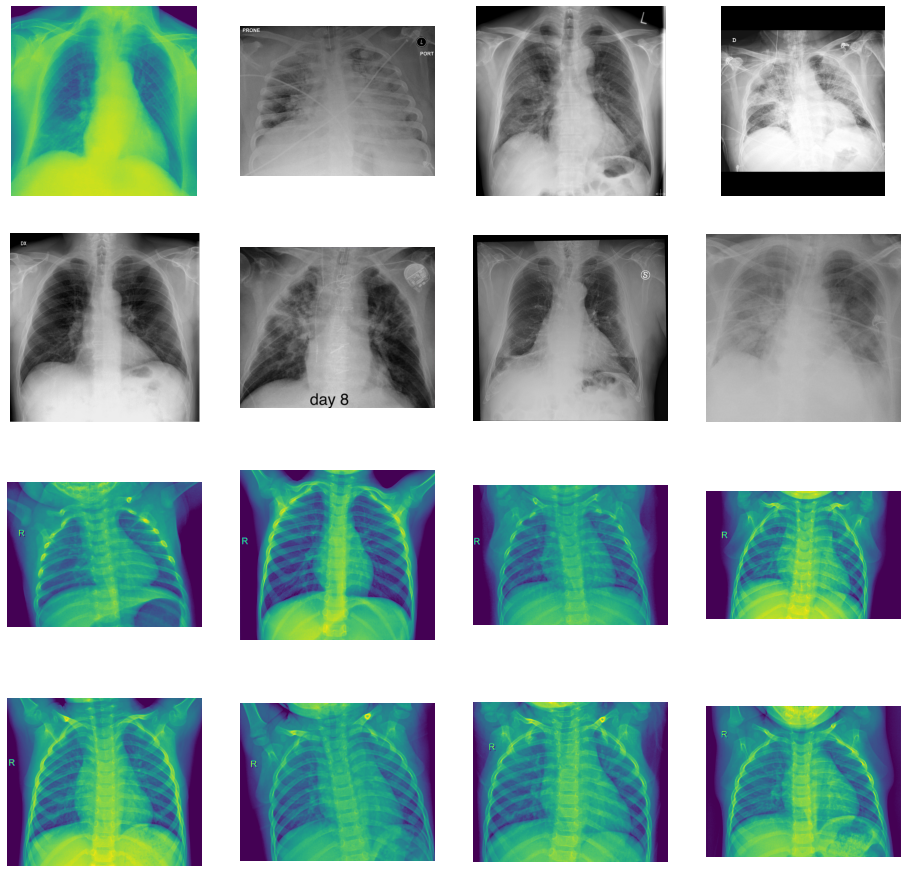

In [21]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_covid_pix = [os.path.join(train_covid, fname) 
                for fname in train_covid_fnames[ pic_index-8:pic_index] 
               ]

next_normal_pix = [os.path.join(train_normal, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_covid_pix+next_normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Next we will define a Sequential layer , adding some convolutional layers first. Note the input shape parameter this time. This time it is 224x224 for the size and 3 (24 bits, 3 bytes) for the color depth.

We then add a couple of convolutional layers , and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [16]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu', input_shape= (224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#model.compile(loss= keras.losses.binary_crossentropy,optimizer = 'adam' , metrics ='accuracy')


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              
              metrics=['accuracy'])

In [18]:
tf.keras.optimizers.Adam()

The model.summary() method call prints a summary of the NN

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [20]:
#train from scratch 

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)







In [22]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32 , 
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [23]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [24]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32 , 
    class_mode = 'binary'
)  

Found 60 images belonging to 2 classes.


In [25]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch =8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 75s 9s/step - loss: 1.3559 - accuracy: 0.5664 - val_loss: 0.6826 - val_accuracy: 0.8500
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6239 - accuracy: 0.6562 - val_loss: 0.5952 - val_accuracy: 0.8000
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.4563 - accuracy: 0.7773 - val_loss: 0.2898 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.2952 - accuracy: 0.9062 - val_loss: 0.2718 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.2148 - accuracy: 0.9219 - val_loss: 0.1245 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.2258 - accuracy: 0.9180 - val_loss: 0.1265 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.1474 - accuracy: 0.9453 - val_loss: 0.0618 - val_accuracy: 0.9833
Epoch 8/10
8/8 [==================

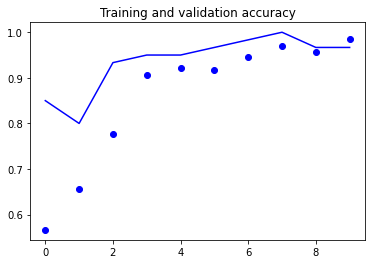

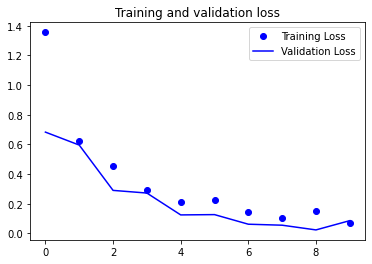

In [43]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
model.save('model_adv.h5')
model.evaluate_generator(train_generator)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


[0.03599829599261284, 0.96875]

In [27]:
model.evaluate_generator(validation_generator)

[0.0858275517821312, 0.9666666388511658]

In [36]:
y_actual = []
y_test = []
import os
for i in os.listdir('./CovidDataset/Val/Normal'):
  img = image.load_img('./CovidDataset/Val/Normal/' + i , target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis = 0)
  p=model.predict_classes(img)
  print(p)
  y_test.append(p[0,0])
  y_actual.append(1)
  print(y_actual)
  print(y_test)

[[1]]
[1]
[1]
[[1]]
[1, 1]
[1, 1]
[[1]]
[1, 1, 1]
[1, 1, 1]
[[1]]
[1, 1, 1, 1]
[1, 1, 1, 1]
[[1]]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[[0]]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0]
[[1]]
[1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[[0]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[[1]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [39]:
print(len(y_actual))
print(len(y_test))


30
30


AttributeError: ignored

In [30]:

for i in os.listdir('./CovidDataset/Val/Covid'):
  img = image.load_img('./CovidDataset/Val/Covid/' + i , target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis = 0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [40]:
y_actual =np.array(y_actual)
y_test = np.array(y_test)
y_test.shape

(30,)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_actual)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


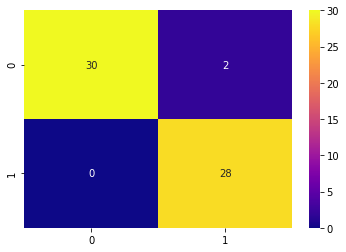

In [33]:
import seaborn as sns
sns.heatmap(cm,cmap='plasma' , annot=True)